# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def throws(x):
    return random.choices(dice, k = x)


dice = [1, 2 ,3 ,4, 5, 6]
#roll=random.choices(dice, k = 10)

rolls=throws(10)

df = pd.DataFrame(rolls, columns=['value'], 
    index=['Roll 1', 'Roll 2', 'Roll 3', 'Roll 4', 'Roll 5', 'Roll 6', 'Roll 7', 'Roll 8', 'Roll 9', 'Roll 10'])
df

,value
Roll 1,2
Roll 2,5
Roll 3,5
Roll 4,4
Roll 5,6
Roll 6,3
Roll 7,2
Roll 8,5
Roll 9,1
Roll 10,2


#### 2.- Plot the results sorted by value.

<AxesSubplot:title={'center':'Dice value for each throw'}>

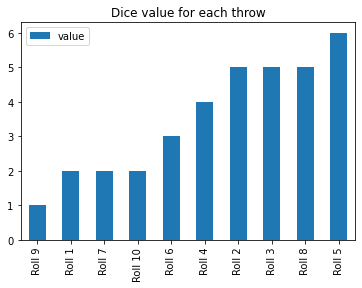

In [3]:
df_sort=df.sort_values(by='value').plot(kind='bar')
plt.title('Dice value for each throw')
df_sort

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:xlabel='value'>

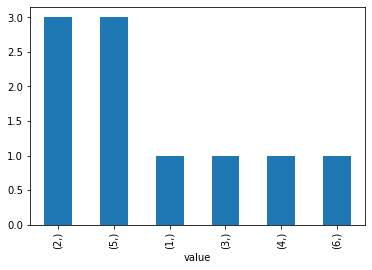

In [4]:
df_count=df.sort_values(by='value').value_counts().plot(kind='bar')
df_count

In [5]:
"""
The bars are sorted from highest to lowest
"""

'\nThe bars are sorted from highest to lowest\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def roll_mean(roll_lst):
    sum = 0
    for i in roll_lst:
        sum = sum + i
   
    return sum/len(roll_lst)
    #return df['Roll Value'].sum()/len(df['Roll Value'])
    #alternative solution from class
roll_mean(rolls)

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def roll_distr(df):
    return df.value_counts()
roll_distr(df['value'])
roll_distr(df).sum()/len(roll_distr(df))
#mean of roll_distr(df) output, not from total rolls (which is len=10, not 6)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [19]:
def median_calc(df):
    if len(df['value'])%2==0:
        return (df['value'][len(df)//2]+df['value'][(len(df)//2)+1])/2
    else:
        x=df['value'][(len(df)//2)-1]
median_calc(df)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
def quartiles_calculation(df):
    Q2 = median_calculation(df)
    index = len(sorted_dice_results['Value']) // 2
    if len(df['Value']) % 2 == 0:
        lower_df = df.iloc[0:index]
        upper_df = df.iloc[index:]
    else:
        lower_df = df.iloc[0:index-1]
        upper_df = df.iloc[index+1:]
    upper_df = reset_df_indexes(upper_df)
    Q1 = median_calculation(lower_df)
    Q3 = median_calculation(upper_df)
    return Q1,Q2,Q3

In [ ]:
#Another Method: 
def quartiles(df):
    Q2 = median_calculation(df)
    Q = df['Value'].quantile([0.25,0.5,0.75])
    return Q
quartiles(df)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

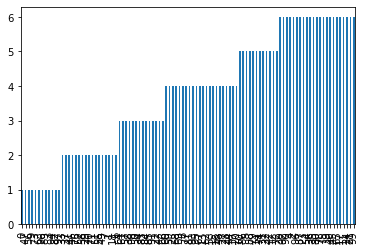

In [26]:
roll_the_dice_hundred=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\roll_the_dice_hundred.csv")
roll_the_dice_hundred['value'].sort_values().plot(kind='bar')


In [19]:
sorted_roll_the_dice_hundred = roll_the_dice_hundred.sort_values('value')

In [31]:
"""
arround 50% of the rolls are 4 and 6. There is a high probability for rolls of 4 or higher
"""

'\narround 50% of the rolls are 4 and 6. There is a high probality for rolls of 4 or higher\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
roll_mean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [21]:
roll_distr(df['value'])

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Text(4.114000000000001, 21.735, 'Mean: 3.74')

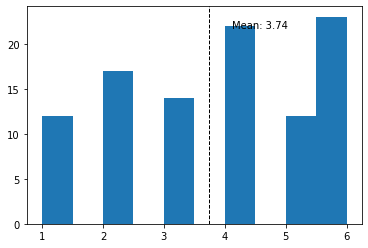

In [22]:
x=df['value']
plt.hist(x)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

In [23]:
"""
We can see that the numbers that showed most times are 4 and 6, and their frequency is significantly greater than the frequency of 1 and 5, which showed the least. That's why the mean value is greater than 3 (almost 4). 
"""

"\nWe can see that the numbers that showed most times are 4 and 6, and their frequency is significantly greater than the frequency of 1 and 5, which showed the least. That's why the mean value is greater than 3 (almost 4). \n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

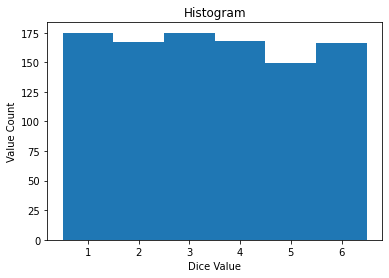

5    149
6    166
1    175
2    167
4    168
3    175
Name: value, dtype: int64

In [34]:
# Calculate the frequency distribution.
frequency = roll_the_dice_thousand['value'].value_counts(sort=False)

# Histogram
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_thousand['value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

# Show the plot.
plt.show()
frequency

In [ ]:
"""
yes,  the rolls are more evenly spread now and not anymore to the higher end
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

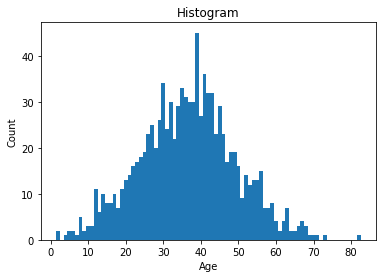

In [36]:
ages_population=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\ages_population.csv")
ages_population = ages_population.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population['observation'].max()) + 1
min_range = int(ages_population['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [39]:
print('Mean: ', ages_population['observation'].mean())
print('Standard Deviation: ',ages_population['observation'].std())


Mean:  36.56
Standard Deviation:  12.816499625976757


In [ ]:
"""
yes values are colse to the guessed one
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

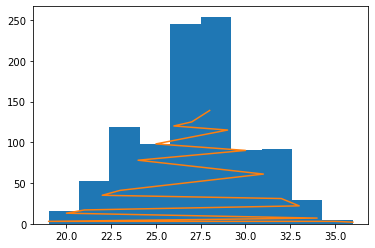

In [50]:
ages_population_2=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\ages_population2.csv")
plt.hist(ages_population_2['observation'])
plt.plot(roll_distr(ages_population_2['observation']))


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
yes, there are mostly only between people between 20 and 35 years
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [51]:
ages_population_2['observation'].mean()
ages_population_2['observation'].std()

2.969813932689186

In [ ]:
"""
the mean is nearlz the same but the standard deviation is a lot lower because the age range in general is smaller then before
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

Text(0.5, 1.0, 'Histogram')

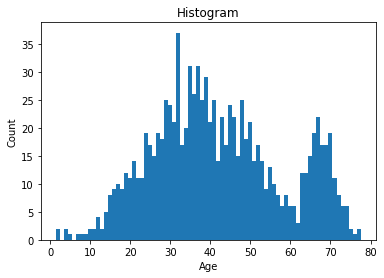

In [44]:
ages_population_3=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\ages_population3.csv")
ages_population_3 = ages_population_3.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_3['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_3['observation'].max()) + 1
min_range = int(ages_population_3['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_3['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [46]:
print('Mean: ', ages_population_3['observation'].mean())
print('Mean: ', ages_population_3['observation'].std())

Mean:  41.989
Mean:  16.144705959865934


In [ ]:
"""
the average age is getting higher and also the standard variation, because age is more distributed this time
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [48]:
ages_population_3['observation'].quantile(0.85)

64.0

"""
We can see that the distribution is now formed by two normals. The first one is centered around 35 and is formed by a lot more samples than the second one, which is centered around 68 approximately.

If we take a look at the quartiles, we can see that 75% of the samples have a value lower or equal to 53, which would be part of the first normal. So the second normal is formed by approximately the 25% of the total samples. If we check the 85% quantile, we can see that 15% of the samples are greater or equal than 64, which is the approximately the limit between both normals. So we can say that, more exactly, the first normal is formed by approximately 85% of the samples while the second is formed by 15% of the samples.

The mean is higher than the median because it is more affected by the second normal. However, the median is lower because it is more robust to extreme values.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [52]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [53]:
sumamry_df = pd.concat([ages_population['observation'], 
                        ages_population_2['observation'], 
                        ages_population_3['observation']], 
                        axis=1, keys=['df1', 'df2', 'df3'])
sumamry_df.describe()

,df1,df2,df3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


"""
df2 has the youngest population with little age variation. df3 has the oldest population with a variation of age.
df1 is mixed population
"""